In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [88]:
df=pd.read_csv("a10.csv")

In [89]:
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [90]:
len(df)

204

In [91]:
df=df[['date','value']]
df.dtypes

date      object
value    float64
dtype: object

In [92]:
df['date']=df['date'].astype('datetime64')
df.set_index('date',inplace=True)
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [93]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             value
date             
1991-07-01  False
1991-08-01  False
1991-09-01  False
1991-10-01  False
1991-11-01  False
...           ...
2008-02-01  False
2008-03-01  False
2008-04-01  False
2008-05-01  False
2008-06-01  False

[204 rows x 1 columns]>

<AxesSubplot:xlabel='date'>

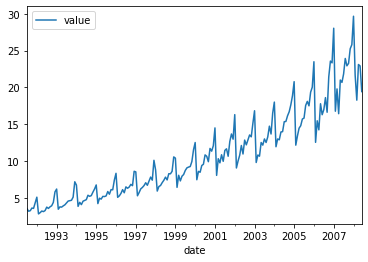

In [94]:
df.plot()

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [96]:
result=seasonal_decompose(df,model='additive')
result

In [97]:
result.trend.head()

date
1991-07-01   NaN
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
Name: trend, dtype: float64

In [98]:
result.seasonal.head()

date
1991-07-01   -0.227809
1991-08-01   -0.023116
1991-09-01   -0.149022
1991-10-01    0.569161
1991-11-01    0.966836
Name: seasonal, dtype: float64

In [99]:
result.resid.head()

date
1991-07-01   NaN
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
Name: resid, dtype: float64

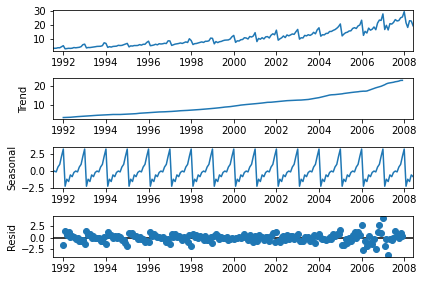

In [100]:
result.plot()
plt.show()

In [101]:
dataset = df.values
dataset = dataset.astype('float32')

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.02651951],
       [0.01364468],
       [0.01630121],
       [0.02966324],
       [0.02798233],
       [0.0555607 ],
       [0.08468322],
       [0.        ],
       [0.00637936],
       [0.01453438],
       [0.01165915],
       [0.01698283],
       [0.03438742],
       [0.02771818],
       [0.03585295],
       [0.04133839],
       [0.05854607],
       [0.11158048],
       [0.12578928],
       [0.02369896],
       [0.03567066],
       [0.03425529],
       [0.04062737],
       [0.04600107],
       [0.05590313],
       [0.06508789],
       [0.06681886],
       [0.06902323],
       [0.08488829],
       [0.16258124],
       [0.14587826],
       [0.03823932],
       [0.05882705],
       [0.04695649],
       [0.06428572],
       [0.0681951 ],
       [0.07217974],
       [0.09445087],
       [0.08900785],
       [0.09262771],
       [0.1102097 ],
       [0.12625581],
       [0.14654902],
       [0.05219754],
       [0.079507  ],
       [0.07480306],
       [0.08864655],
       [0.087

In [103]:
train_size = int(len(dataset)*0.70)
train = dataset[:train_size, :]
test = dataset[train_size:, :]

In [104]:
def make_dataset(dataset, lookback=1):
    datax, datay = [], []
    for i in range(len(dataset)-lookback-1):
        x = dataset[i:(i+lookback), 0]
        datax.append(x)
        datay.append(dataset[i+lookback, 0])
    datax = np.array(datax)
    datay = np.array(datay)
    return datax, datay

In [105]:
lookback = 1
trainx, trainy = make_dataset(train, lookback)
testx, testy = make_dataset(test, lookback)
trainx = np.reshape(trainx, (trainx.shape[0], 1,
                            trainx.shape[1]))
testx = np.reshape(testx, (testx.shape[0], 1, 
                          testx.shape[1]))

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
tf.random.set_seed(7)

In [107]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', 
             optimizer='adam')
model.fit(trainx, trainy, epochs=10, 
          batch_size=1)

Epoch 1/10
140/140 [==============================] - 3s 3ms/step - loss: 0.0245
Epoch 2/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 3/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 4/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 5/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 6/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 7/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 8/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 9/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 10/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0056


In [108]:
trainpredict = model.predict(trainx)
testpredict = model.predict(testx)

In [109]:
trainpredict = scaler.inverse_transform(trainpredict)
trainy=scaler.inverse_transform([trainy])
testpredict=scaler.inverse_transform(testpredict)
testy=scaler.inverse_transform([testy])

In [110]:
from sklearn.metrics import mean_squared_error
mean_squared_error(trainy [0], trainpredict[:, 0])

3.6815236226140176

In [111]:
mean_squared_error(testy [0], testpredict[:, 0])

36.97278166270176

In [112]:
trainpredictplot = np.empty_like(dataset)
trainpredictplot[:,:]= np.nan
trainpredictplot[lookback:len(trainpredict)+lookback,:] = trainpredict

In [113]:
testpredictplot = np.empty_like(dataset)
testpredictplot[:,:] = np.nan
testpredictplot[((2*lookback)+len(trainpredict))+1:len(dataset)-1,:]=testpredict

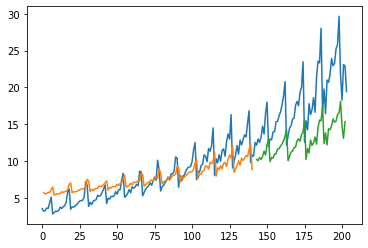

In [114]:
dataset=scaler.inverse_transform(dataset)
plt.plot(dataset)
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [ ]:
#blueline actual data
#orangeline trainpredict
#greenline testpredict